## The following code is meant as a guide to help you complete the assignment.  Many of the lines are meant to be changed. For example, the first two lines after the header, detailing the sampling rate and number of data points, should be changed to match the situation you are asked to simulate in the problem.

In [5]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

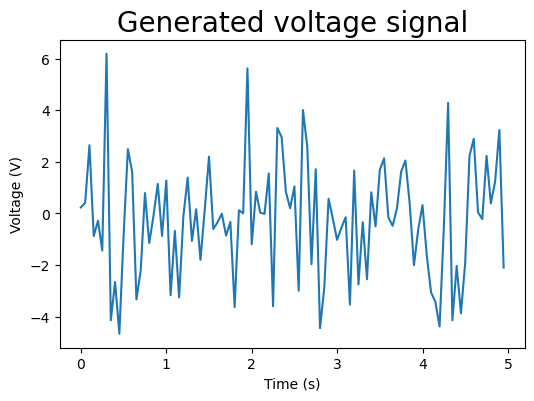

In [6]:
fs = 20 # Sampling rate
N = 100 # Number of Data Points

time = np.arange(N) / fs  # total signal time is num of points / sampling rate

v = np.random.normal(scale=np.sqrt(5), size=time.shape) # add noise

plt.figure(figsize=(6,4))

plt.plot(time,v)

plt.title('Generated voltage signal', fontsize=20)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

plt.show()

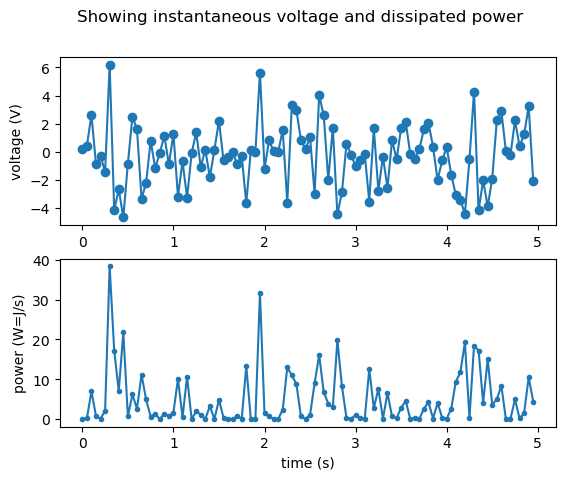

In [9]:
# Now suppose this voltage signal (which is changing stepwise in time) is applied across a resistor of resistance R.
# Modify this code to calculate the power at each moment in time (again you may assume it changes stepwise).

R=1 #We'll use a resistor of 1 ohm for now
power = v ** 2 / R #this expression is wrong, make it correct to calculate
            #the power (in Joules) dissipated at each moment in time when the voltage v(time) is applied 
            #across a resistor of resistance R.  Hint: how do you calculate Joule heating for voltage v and resistance r?

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Showing instantaneous voltage and dissipated power')

ax1.plot(time, v, 'o-')
ax1.set_ylabel('voltage (V)')

ax2.plot(time, power, '.-')
ax2.set_ylabel('power (W=J/s)')
ax2.set_xlabel('time (s)')


plt.show()
        

In [24]:
v_rms = np.sqrt(np.mean(power))

v_rms

2.2318200908330574

# Computing and Plotting the Power Spectral Density

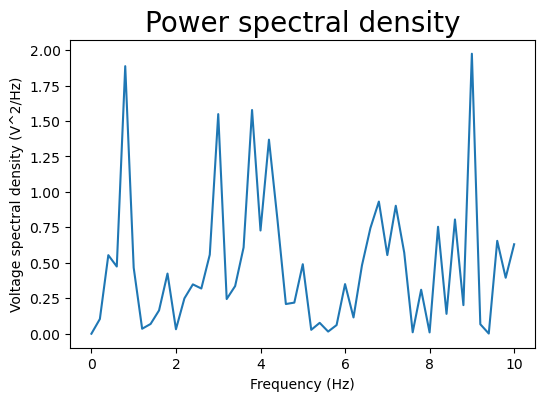

In [28]:
# This code uses Periodogram to calculate a power spectrum

f, Pxx_den = signal.periodogram(v, fs, 'boxcar', scaling='density')

plt.figure(figsize=(6,4))

plt.plot(f,Pxx_den)

plt.title('Power spectral density', fontsize=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage spectral density (V^2/Hz)')

plt.show()

In [50]:
zl = list(zip(f, Pxx_den))
power_arr = [0]

for i in zl:
    
    if i[0] % 2 == 0 and i[0] != 0:
        power_arr.append(i[1])
        
    else:
        power_arr[-1] += i[1]
        

print(power_arr)

[4.177440399288086, 0.03150717924466614]
(2.0, 0.03150717924466614)
[4.177440399288086, 5.821120990301221, 0.7279264842455456]
(4.0, 0.7279264842455456)
[4.177440399288086, 5.821120990301221, 4.003593638872426, 0.34999126402885544]
(6.0, 0.34999126402885544)
[4.177440399288086, 5.821120990301221, 4.003593638872426, 4.973484627723641, 0.009256222745607643]
(8.0, 0.009256222745607643)
[4.177440399288086, 5.821120990301221, 4.003593638872426, 4.973484627723641, 5.003548569506363, 0.6309846724005473]
(10.0, 0.6309846724005473)
[4.177440399288086, 5.821120990301221, 4.003593638872426, 4.973484627723641, 5.003548569506363, 0.6309846724005473]


[(0.0, 6.310887241768095e-33), (0.2, 0.10379107852730889), (0.4, 0.5540408859834886), (0.6000000000000001, 0.4739542265348689), (0.8, 1.8869924002883314), (1.0, 0.465827535505082), (1.2000000000000002, 0.03509575062782017), (1.4000000000000001, 0.06884282685276331), (1.6, 0.16457944858086573), (1.8, 0.42431624638755755), (2.0, 0.03150717924466614), (2.2, 0.24931888395561616), (2.4000000000000004, 0.3480130581843656), (2.6, 0.3187898167664859), (2.8000000000000003, 0.5574687986771765), (3.0, 1.548852534929457), (3.2, 0.24460043413848148), (3.4000000000000004, 0.33613723545348795), (3.6, 0.6086255408012325), (3.8000000000000003, 1.577807508150253), (4.0, 0.7279264842455456), (4.2, 1.3686981297993202), (4.4, 0.8073796816882396), (4.6000000000000005, 0.20939759827546242), (4.800000000000001, 0.21940859306438662), (5.0, 0.490409438360968), (5.2, 0.027537121443344525), (5.4, 0.0766899768908646), (5.6000000000000005, 0.015193222011199058), (5.800000000000001, 0.06095339309309474), (6.0, 0.349